# TVA

In [17]:
import warnings

warnings.filterwarnings("ignore")

from src import utils
from src.utils import VotingSchemas
from src.outcomes import *
from src.happiness_level import HappinessLevel
from src.strategic_voting_risk import StrategicVoting
import os
import numpy as np
import matplotlib.pyplot as plt

## Input Voting Preference

In [15]:
path_voting = "input/voting_result.json"
if "env" in os.environ:
    if os.environ["env"] == "docker":
        path_voting = "/input/voting_result.json"
voting = utils.read_voting(path_voting, table_name="four_candidates")[:,:7]
display(voting.to_pandas())

,voter_0,voter_1,voter_2,voter_3,voter_4,voter_5,voter_6
preference_0,1,3,2,3,1,1,0
preference_1,2,0,3,0,2,0,2
preference_2,0,2,1,2,0,2,1
preference_3,3,1,0,1,3,3,3


In [23]:
import pandas as pd
voting.to_pandas().to_latex(index=False)

'\\begin{tabular}{rrrrrrr}\n\\toprule\nvoter_0 & voter_1 & voter_2 & voter_3 & voter_4 & voter_5 & voter_6 \\\\\n\\midrule\n1 & 3 & 2 & 3 & 1 & 1 & 0 \\\\\n2 & 0 & 3 & 0 & 2 & 0 & 2 \\\\\n0 & 2 & 1 & 2 & 0 & 2 & 1 \\\\\n3 & 1 & 0 & 1 & 3 & 3 & 3 \\\\\n\\bottomrule\n\\end{tabular}\n'

## Voting Outcomes

In [10]:
outcomes = all_schemas_outcomes(voting)
outcomes_df = all_schemas_outcomes_to_pandas(outcomes)
outcomes_df

,0,1,2,3,Winner
Plurality Voting,1,3,1,2,1
Voting for Two,4,3,4,3,0
Veto Voting,6,5,7,3,2
Borda Voting,11,11,12,8,2


## Happiness Level

Voters Happiness Level


,Happiness Level
voter_0,1.000000
voter_1,0.000000
voter_2,0.410487
voter_3,0.000000
voter_4,1.000000
voter_5,1.000000
voter_6,0.410487



Overall Happiness Level: 3.8209731815334376

Happiness Level Distribution


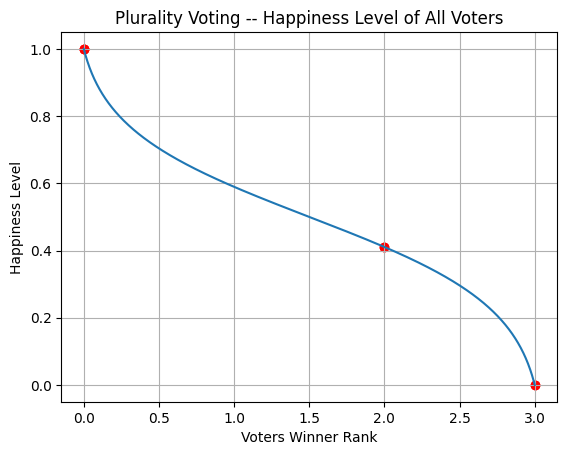


Histogram of Happiness Level


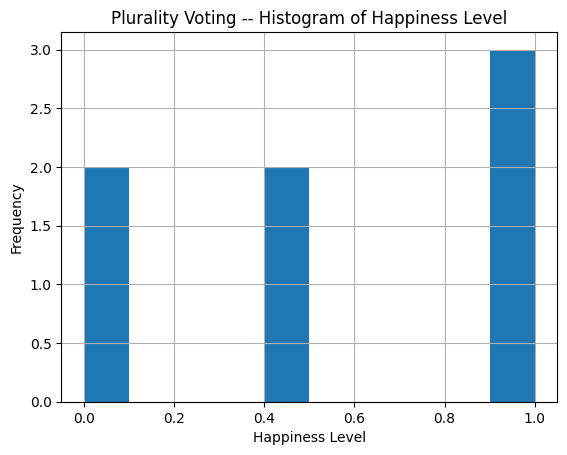

In [11]:
pv_h = HappinessLevel(
    voting,
    outcomes[VotingSchemas.PLURALITY_VOTING.value].winner,
    VotingSchemas.PLURALITY_VOTING,
).run(True)

vt_h = HappinessLevel(
    voting,
    outcomes[VotingSchemas.VOTING_FOR_TWO.value].winner,
    VotingSchemas.VOTING_FOR_TWO,
).run()

vv_h = HappinessLevel(
    voting,
    outcomes[VotingSchemas.VETO_VOTING.value].winner,
    VotingSchemas.VETO_VOTING,
).run()

bv_h = HappinessLevel(
    voting,
    outcomes[VotingSchemas.BORDA_VOTING.value].winner,
    VotingSchemas.BORDA_VOTING,
).run()

## Strategic Voting

In [12]:
plurality_best = StrategicVoting(voting, pv_h, plurality_outcome).run().best
fortwo_best = StrategicVoting(voting, vt_h, for_two_outcome).run().best
borda_best = StrategicVoting(voting, bv_h, borda_outcome).run().best
veto_best = StrategicVoting(voting, vv_h, veto_outcome).run().best

plurality_risk = StrategicVoting(voting, pv_h, plurality_outcome).run().risk
fortwo_risk= StrategicVoting(voting, vt_h, for_two_outcome).run().risk
borda_risk = StrategicVoting(voting, bv_h, borda_outcome).run().risk
veto_risk = StrategicVoting(voting, vv_h, veto_outcome).run().risk

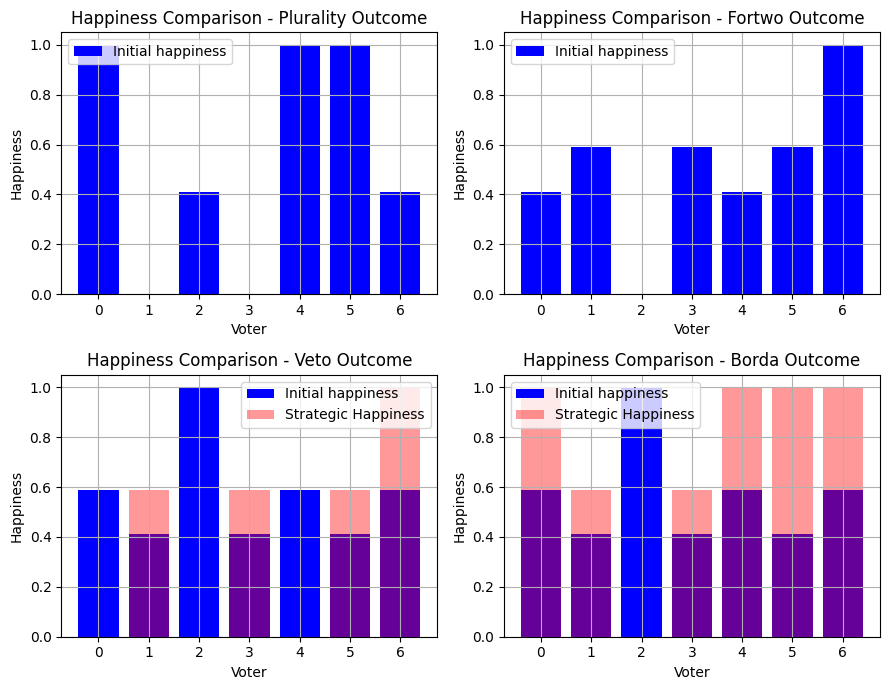

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(9, 7))

outcomes = [
    (plurality_best, pv_h, 'Plurality'),
    (fortwo_best, vt_h, 'Fortwo'),
    (veto_best, vv_h, 'Veto'),
    (borda_best, bv_h, 'Borda')
]

for ax, (best, h, title) in zip(axs.flatten(), outcomes):
    ax.bar(range(h.voter.shape[0]), h.voter, color='blue', label='Initial happiness')

    if not best.empty:
        ax.bar(best['voter'], best['strategic_H'], color='red', alpha=0.4, label='Strategic Happiness')

    ax.set_title(f'Happiness Comparison - {title} Outcome')
    ax.set_xlabel('Voter')
    ax.set_ylabel('Happiness')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()



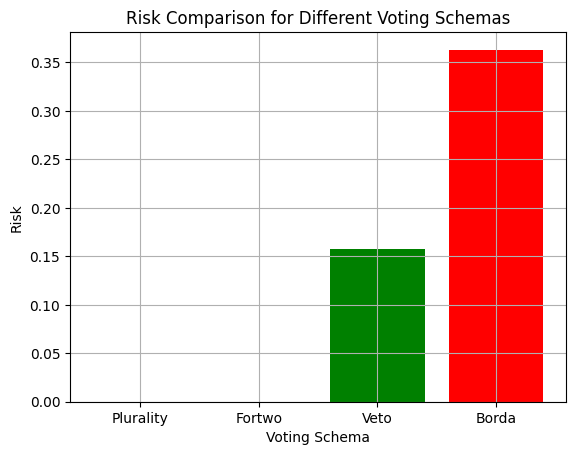

In [14]:
risks = [plurality_risk, fortwo_risk, veto_risk, borda_risk]
outcomes = ['Plurality', 'Fortwo', 'Veto', 'Borda']

plt.bar(outcomes, risks, color=['blue', 'orange', 'green', 'red'])
plt.title('Risk Comparison for Different Voting Schemas')
plt.xlabel('Voting Schema')
plt.ylabel('Risk')
plt.grid(True)
plt.show()